In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [4]:
df = pd.read_parquet("../data/parquet/steam_games_modelo.parquet", engine="pyarrow")
df

,app_name,url,price,early_access,developer,sentiment,metascore,año_v,Accounting,Action,...,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Tracked Motion Controllers,Valve Anti-Cheat enabled,Windows Mixed Reality
0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,4.99,0,Kotoshiro,None,NaN,2018,0,1,...,0,0,0,0,0,0,0,0,0,0
1,弹炸人2222,http://store.steampowered.com/app/767400/2222/,0.99,0,彼岸领域,Mostly Positive,NaN,2017,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Log Challenge,http://store.steampowered.com/app/773570/Log_C...,2.99,0,<NA>,2 user reviews,NaN,2018,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,3.99,0,Trickjump Games Ltd,Mixed,NaN,2018,0,1,...,1,0,0,0,0,0,0,0,0,0
4,SNOW - All Access Basic Pass,http://store.steampowered.com/app/774276/SNOW_...,9.99,0,Poppermost Productions,None,NaN,2018,0,0,...,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28651,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,1.99,0,"Nikita ""Ghost_RUS""",Negative,NaN,2018,0,0,...,1,0,0,0,0,0,0,0,0,0
28652,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,4.99,0,Sacada,5 user reviews,NaN,2018,0,0,...,1,1,1,0,0,0,0,0,0,0
28653,Russian Roads,http://store.steampowered.com/app/610660/Russi...,1.99,0,Laush Dmitriy Sergeevich,Mostly Positive,NaN,2018,0,0,...,1,0,0,1,0,0,0,0,0,0
28654,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,4.99,0,"xropi,stev3ns",1 user reviews,NaN,2017,0,0,...,1,1,0,0,0,0,0,0,0,0


In [5]:
df2 = df.copy()

## Dropeamos columnas que sentimos que son irrelevantes para nuestro modelo

In [7]:
df2["año_v"] = df2["año_v"].astype("int64")

In [8]:
df2["developer"].isnull().sum()

2747

In [10]:
df2.corr()

,price,early_access,metascore,año_v,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,...,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Tracked Motion Controllers,Valve Anti-Cheat enabled,Windows Mixed Reality
price,1.000000,0.054841,0.176329,0.021826,0.054885,-0.033370,-0.038166,0.128331,0.087434,-0.197992,...,-0.022659,0.007031,-0.056694,-0.011088,0.019854,0.097615,0.046663,0.035121,-0.002364,0.033266
early_access,0.054841,1.000000,0.019054,0.117289,-0.003590,0.046181,0.004377,0.000103,-0.006355,-0.048114,...,-0.085405,-0.071610,-0.042881,-0.089622,0.001727,0.004705,0.012903,0.205777,-0.021926,0.066635
metascore,0.176329,0.019054,1.000000,-0.108627,NaN,-0.040145,-0.048358,NaN,NaN,-0.019407,...,-0.041810,0.075076,-0.005490,-0.021350,0.008863,0.078064,0.038141,0.001697,0.046235,0.026958
año_v,0.021826,0.117289,-0.108627,1.000000,0.005521,-0.005767,0.032086,0.014287,0.010261,0.091080,...,0.163883,0.033799,0.037706,0.127097,0.012790,0.036288,0.015925,0.126250,-0.038822,0.043664
Accounting,0.054885,-0.003590,NaN,0.005521,1.000000,-0.010661,-0.008515,0.036412,0.047794,-0.008735,...,-0.015152,-0.010053,-0.007262,-0.011714,-0.000746,-0.003653,-0.000428,-0.003255,-0.001782,-0.000966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Steam Workshop,0.097615,0.004705,0.078064,0.036288,-0.003653,-0.052662,-0.085309,0.022337,-0.009625,-0.078931,...,0.130728,0.170107,0.135584,0.182914,0.012711,1.000000,-0.002480,-0.038930,0.028311,-0.005776
SteamVR Collectibles,0.046663,0.012903,0.038141,0.015925,-0.000428,-0.019294,-0.017388,-0.001916,-0.001473,-0.017836,...,0.006924,0.007220,0.008762,-0.004582,-0.001524,-0.002480,1.000000,0.125851,-0.003639,0.175972
Tracked Motion Controllers,0.035121,0.205777,0.001697,0.126250,-0.003255,-0.165705,-0.132354,-0.014586,-0.011210,-0.135764,...,-0.105303,-0.103735,-0.012841,-0.128737,-0.008430,-0.038930,0.125851,1.000000,-0.027697,0.289265
Valve Anti-Cheat enabled,-0.002364,-0.021926,0.046235,-0.038822,-0.001782,0.137624,-0.050734,-0.007985,-0.006137,-0.069120,...,0.090532,0.116462,0.149937,0.024464,-0.006350,0.028311,-0.003639,-0.027697,1.000000,-0.008216


In [9]:
df2_only_numeric = df2.select_dtypes(include="number")
df2_only_numeric.isna().sum()

price                             0
early_access                      0
metascore                     26162
año_v                             0
Accounting                        0
                              ...  
Steam Workshop                    0
SteamVR Collectibles              0
Tracked Motion Controllers        0
Valve Anti-Cheat enabled          0
Windows Mixed Reality             0
Length: 66, dtype: int64

In [29]:
df_mod = df2_only_numeric.loc[:, [ "price","metascore", "año_v","early_access","Action","Adventure","Casual","Indie","Racing","Simulation","Sports","Strategy", "Massively Multiplayer", "RPG"]]

In [30]:
df_mod.dropna(subset=["año_v"], inplace=True)

In [33]:
df_mod = df_mod[df_mod["año_v"]<=2018]

In [34]:
df_mod

,price,metascore,año_v,early_access,Action,Adventure,Casual,Indie,Racing,Simulation,Sports,Strategy,Massively Multiplayer,RPG
1,0.99,NaN,2017,0,1,1,1,0,0,0,0,0,0,0
18,2.99,NaN,2017,0,0,0,0,0,1,1,1,0,0,0
19,2.99,NaN,2017,0,0,0,0,0,1,1,1,0,0,0
22,9.99,NaN,1997,0,1,0,0,1,1,0,0,0,0,0
23,9.99,96.0,1998,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28641,14.99,93.0,2004,0,1,0,0,0,0,0,0,0,0,0
28642,9.99,65.0,2004,0,1,0,0,0,0,0,0,0,0,0
28645,4.99,NaN,2016,0,0,0,0,0,0,0,0,0,0,0
28654,4.99,NaN,2017,0,0,0,1,1,0,0,0,0,0,0


In [35]:
df_mod.head()

,price,metascore,año_v,early_access,Action,Adventure,Casual,Indie,Racing,Simulation,Sports,Strategy,Massively Multiplayer,RPG
1,0.99,NaN,2017,0,1,1,1,0,0,0,0,0,0,0
18,2.99,NaN,2017,0,0,0,0,0,1,1,1,0,0,0
19,2.99,NaN,2017,0,0,0,0,0,1,1,1,0,0,0
22,9.99,NaN,1997,0,1,0,0,1,1,0,0,0,0,0
23,9.99,96.0,1998,0,1,0,0,0,0,0,0,0,0,0


In [36]:
df_mod.corr()

,price,metascore,año_v,early_access,Action,Adventure,Casual,Indie,Racing,Simulation,Sports,Strategy,Massively Multiplayer,RPG
price,1.000000,0.176329,0.020059,0.049798,-0.032448,-0.036905,-0.197237,-0.190423,-0.003171,0.069875,0.034046,0.029402,0.192269,0.058314
metascore,0.176329,1.000000,-0.108627,0.019054,-0.040145,-0.048358,-0.019407,-0.082380,-0.009380,-0.048767,0.019172,0.013920,0.044180,0.048786
año_v,0.020059,-0.108627,1.000000,0.101072,-0.002818,0.034255,0.094410,0.230958,0.002016,0.027127,0.051835,-0.008990,0.050630,0.052025
early_access,0.049798,0.019054,0.101072,1.000000,0.057501,0.013330,-0.039385,0.097187,0.013666,0.006985,0.010596,0.004051,0.031989,0.028563
Action,-0.032448,-0.040145,-0.002818,0.057501,1.000000,0.147568,-0.121803,0.192787,0.020970,-0.225855,-0.019499,-0.153610,0.074137,-0.023741
Adventure,-0.036905,-0.048358,0.034255,0.013330,0.147568,1.000000,0.059001,0.235869,-0.061325,-0.168073,-0.073537,-0.117305,0.004922,0.126709
Casual,-0.197237,-0.019407,0.094410,-0.039385,-0.121803,0.059001,1.000000,0.163714,-0.029734,0.188448,0.042680,-0.036126,-0.031187,-0.126140
Indie,-0.190423,-0.082380,0.230958,0.097187,0.192787,0.235869,0.163714,1.000000,-0.015383,-0.145195,-0.005317,0.138274,-0.034201,0.172696
Racing,-0.003171,-0.009380,0.002016,0.013666,0.020970,-0.061325,-0.029734,-0.015383,1.000000,0.081002,0.373041,-0.076402,0.014930,-0.072482
Simulation,0.069875,-0.048767,0.027127,0.006985,-0.225855,-0.168073,0.188448,-0.145195,0.081002,1.000000,0.205505,0.041585,0.008544,-0.114784


<AxesSubplot:>

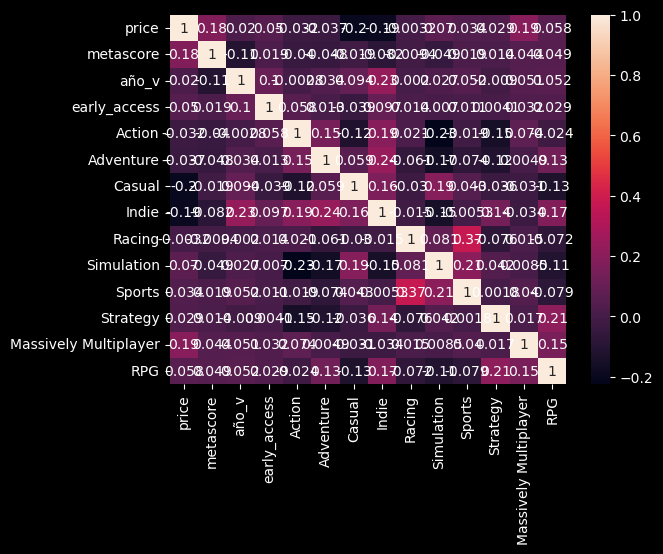

In [37]:
sns.heatmap(data=df_mod.corr(), annot=True)

In [1920]:
df_mod.describe()

,price,metascore,año_v,early_access,Action,Adventure,Casual,Indie,Racing,Simulation,Sports,Strategy,Massively Multiplayer,RPG
count,28603.000000,2494.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000
mean,8.771905,72.244988,2014.815474,0.056323,0.352411,0.257595,0.267524,0.498025,0.034507,0.218404,0.039681,0.221061,0.025172,0.165752
std,9.329503,10.789183,3.510252,0.230548,0.477729,0.437318,0.442676,0.500005,0.182530,0.413170,0.195212,0.414969,0.156651,0.371864
min,0.490000,20.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.990000,66.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.990000,74.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.990000,80.000000,2017.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.990000,96.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Momento de entrenar el modelo

In [38]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,  Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

In [39]:
features_to_normalize = ["metascore", "año_v"]
scaler = StandardScaler()
df_mod[features_to_normalize] = scaler.fit_transform(df_mod[features_to_normalize])

In [40]:
df_mod["price"].min()

0.49

In [41]:
df_mod["price"].max()

89.99

## Funcion que nos permite ver el modelo y poder saber el valor de RMSE que maneja

In [43]:
def RMSE_AND_R2(modelo, X_test, y_test) : 
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {F"El RMSE de tu {modelo} es {rmse}, y el r2 {r2}"}

### Acá separe los diferentes df dependiendo de si haciamos un dropna o un drop a la columna metascore

In [44]:
df_mod_sinmetascore = df_mod.drop(columns="metascore")
df_mod_predecirmetascore_dropna = df_mod.dropna(subset="metascore")## dropna metascore

In [45]:
X_predecirmetascore = df_mod_predecirmetascore_dropna.drop(columns="price")
y_predecirmetascore = df_mod_predecirmetascore_dropna["price"]

In [46]:
X_sinmetascore = df_mod_sinmetascore.drop(columns="price")
y_sinmetascore  = df_mod_sinmetascore["price"]

## Acá lo que hacemos es usar el metascore sin dropna

In [47]:
X = df_mod.drop(columns="price")
y = df_mod["price"]
y_values = y.values.flatten()

In [48]:
df_mod["metascore"].median()

0.16269665947864997

In [49]:
df_mod

,price,metascore,año_v,early_access,Action,Adventure,Casual,Indie,Racing,Simulation,Sports,Strategy,Massively Multiplayer,RPG
1,0.99,NaN,0.626263,0,1,1,1,0,0,0,0,0,0,0
18,2.99,NaN,0.626263,0,0,0,0,0,1,1,1,0,0,0
19,2.99,NaN,0.626263,0,0,0,0,0,1,1,1,0,0,0
22,9.99,NaN,-5.069165,0,1,0,0,1,1,0,0,0,0,0
23,9.99,2.202185,-4.784394,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28641,14.99,1.924073,-3.075765,0,1,0,0,0,0,0,0,0,0,0
28642,9.99,-0.671639,-3.075765,0,1,0,0,0,0,0,0,0,0,0
28645,4.99,NaN,0.341492,0,0,0,0,0,0,0,0,0,0,0
28654,4.99,NaN,0.626263,0,0,0,1,1,0,0,0,0,0,0


In [50]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(X)
X_Transform = imp_mean.transform(X)

X_Transform

c:\Users\Agus_\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


array([[0.71892074, 0.62626305, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71892074, 0.62626305, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71892074, 0.62626305, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.71892074, 0.34149165, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71892074, 0.62626305, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71892074, 0.62626305, 1.        , ..., 0.        , 0.        ,
        0.        ]])

## Con Metascore pero los NA dropeados

In [1934]:
X_train, X_test, y_train, y_test= train_test_split(X_predecirmetascore, y_predecirmetascore, test_size=0.33, random_state = 42)
model1dropna = LinearRegression()
model1dropna.fit(X_train, y_train)
RMSE_AND_R2(model1dropna, X_test, y_test)

{'El RMSE de tu LinearRegression() es 8.271483186539358, y el r2 0.30201106467763716'}

In [1935]:
y_predict = model1dropna.predict(conmetascore)
y_predict

array([25.00505313])

### Cross valid hacer crossvalid

In [1936]:
# Crear una tubería con StandardScaler y LinearRegression
model = LinearRegression()
linearmodel = cross_val_score(model, X_predecirmetascore, y_predecirmetascore, cv=4 )
linearmodel

array([0.06655351, 0.24162054, 0.30856624, 0.07269017])

In [1937]:
linearmodel = cross_validate(model, X_predecirmetascore, y_predecirmetascore, cv=5, scoring =["neg_root_mean_squared_error", "r2"])
linearmodel

{'fit_time': array([0.00599909, 0.00499892, 0.00500059, 0.02799726, 0.00299859]),
 'score_time': array([0.07599831, 0.00299931, 0.00500011, 0.00200081, 0.00200033]),
 'test_neg_root_mean_squared_error': array([ -6.49614505,  -9.95662571, -11.65993999,  -7.92702839,
         -6.64226731]),
 'test_r2': array([ 0.0208635 ,  0.2931085 ,  0.28394552,  0.28499538, -0.02032175])}

In [1938]:
linearmodel = cross_validate(model, X_sinmetascore, y_sinmetascore, cv=5, scoring =["neg_root_mean_squared_error", "r2"])

## Grid Search

In [1939]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

ridge = Ridge()
lasso = Lasso()

grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [1940]:
best_lasso = grid_search_lasso.best_estimator_
RMSE_AND_R2(best_lasso, X_test, y_test)

{'El RMSE de tu Lasso(alpha=0.1) es 8.296470085460237, y el r2 0.29778765727760725'}

In [1941]:
best_lasso.predict(conmetascore)

array([22.32184823])

In [1942]:
best_ridge = grid_search_ridge.best_estimator_
RMSE_AND_R2(best_ridge, X_test, y_test)

{'El RMSE de tu Ridge(alpha=10.0) es 8.262598155665035, y el r2 0.30350978558805863'}

In [1943]:
best_ridge.predict(conmetascore)

array([22.60669009])

### Grid Search para encontrar el mejor modelo

In [1944]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

ridge = Ridge()
lasso = Lasso()

grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [1945]:
best_lasso = grid_search_lasso.best_estimator_
RMSE_AND_R2(best_lasso, X_test, y_test)

{'El RMSE de tu Lasso(alpha=0.1) es 8.296470085460237, y el r2 0.29778765727760725'}

In [1946]:
best_ridge = grid_search_ridge.best_estimator_
RMSE_AND_R2(best_ridge, X_test, y_test)

{'El RMSE de tu Ridge(alpha=10.0) es 8.262598155665035, y el r2 0.30350978558805863'}

In [1947]:
np.sqrt(grid_search.best_score_ * -1)

8.235633786951471

### Polinomico Regresion

In [1948]:
degree = 3
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [1949]:
modelploy_dropna_metascore = LinearRegression()
modelploy_dropna_metascore.fit(X_train_poly, y_train)
RMSE_AND_R2(modelploy_dropna_metascore, X_test_poly, y_test)

{'El RMSE de tu LinearRegression() es 35060397505.06406, y el r2 -1.2540516587240745e+19'}

# SIN METASCORE 

In [1950]:
X_train, X_test, y_train, y_test= train_test_split(X_sinmetascore, y_sinmetascore, test_size=0.33, random_state = 42)

In [1951]:
model_sin_metascore = LinearRegression()
model_sin_metascore.fit(X_train, y_train)

LinearRegression()

In [1952]:
RMSE_AND_R2(model_sin_metascore, X_test, y_test)

{'El RMSE de tu LinearRegression() es 8.853454593495252, y el r2 0.10357757567364012'}

### Regresion Polinomica sin metascore

In [1953]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
modelploy.fit(X_train_poly, y_train)

LinearRegression()

In [1954]:
RMSE_AND_R2(modelploy, X_test_poly, y_test)

{'El RMSE de tu LinearRegression() es 4757996.164648815, y el r2 -258901972210.49857'}

### GridSearch sin metascore

In [1955]:

param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

ridge = Ridge()
lasso = Lasso()

grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [1956]:
## lasso
best_lasso = grid_search_lasso.best_estimator_
RMSE_AND_R2(best_lasso, X_test, y_test)

{'El RMSE de tu Lasso(alpha=0.1) es 8.881685062019626, y el r2 0.09785172678815557'}

In [1957]:
best_ridge = grid_search_ridge.best_estimator_
RMSE_AND_R2(best_ridge, X_test, y_test)

{'El RMSE de tu Ridge() es 8.853290234928041, y el r2 0.10361085835129702'}

# IMPUTANDO CON LA MEDIA EN METASCORE

In [1958]:
X_train, X_test, y_train, y_test= train_test_split(X_Transform, y, test_size=0.33, random_state = 42)

In [1959]:
model_inputado = LinearRegression()
model_inputado.fit(X_train, y_train)

LinearRegression()

In [1960]:
RMSE_AND_R2(model_inputado, X_test, y_test)

{'El RMSE de tu LinearRegression() es 8.83097839377787, y el r2 0.10812328022848972'}

### Regresion Polinomica con valores MetaScore Inputados con la media 

In [1962]:
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [1963]:
modelploy = LinearRegression()

In [1964]:
modelploy.fit(X_train_poly, y_train)

LinearRegression()

In [1965]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

ridge = Ridge()
lasso = Lasso()

grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [1966]:
## lasso
best_lasso = grid_search_lasso.best_estimator_
RMSE_AND_R2(best_lasso, X_test, y_test)

{'El RMSE de tu Lasso(alpha=0.1) es 8.861851506558004, y el r2 0.10187637517602877'}

In [1967]:
## lasso
best_ridge = grid_search_ridge.best_estimator_
RMSE_AND_R2(best_lasso, X_test, y_test)

{'El RMSE de tu Lasso(alpha=0.1) es 8.861851506558004, y el r2 0.10187637517602877'}

# RandomForest

In [1968]:
X_train, X_test, y_train, y_test= train_test_split(X_predecirmetascore, y_predecirmetascore, test_size=0.33, random_state = 42)

In [1969]:
def RandomForest(X, y, profundidad):
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state = 42)
    RandomForest = RandomForestRegressor(max_depth=profundidad)
    RandomForest.fit(X_train, y_train)
    print(RMSE_AND_R2(RandomForest, X_test, y_test))
    return RandomForest

### RandomForestRegressor con dropna

In [1970]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [1971]:
# Crear el modelo de Random Forest
rf_model = RandomForestRegressor()

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [1972]:
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntaje:", np.sqrt(grid_search.best_score_*-1))
RMSE_AND_R2(grid_search.best_estimator_, X_test, y_test)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mejor puntaje: 8.428682966154886


{'El RMSE de tu RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,\n                      n_estimators=200) es 7.90537161338805, y el r2 0.362432258299236'}

In [1973]:
modelorandom9_2 = grid_search.best_estimator_

In [1974]:
rand_for = RandomForest(X_predecirmetascore,y_predecirmetascore, 5)

{'El RMSE de tu RandomForestRegressor(max_depth=5) es 7.9457058419114315, y el r2 0.35590975513801215'}


In [1975]:
RandomForest(X_sinmetascore,y_sinmetascore, 5)

{'El RMSE de tu RandomForestRegressor(max_depth=5) es 8.680222785515257, y el r2 0.13831421767201446'}


RandomForestRegressor(max_depth=5)

In [1976]:
rand_for.predict(conmetascore)

array([25.86529733])

### RandomForestRegressor sin metascore

In [1977]:
model = RandomForest(X_sinmetascore,y_sinmetascore,3)

{'El RMSE de tu RandomForestRegressor(max_depth=3) es 8.884107264018647, y el r2 0.09735959420159568'}


In [1978]:
sinmetascore = pd.DataFrame({ 
                    # Ejemplo: metascore
    "año_v": [2010],  # Ejemplo: año
    "early_access": [1],  # Ejemplo: early_access
    "Action": [0],  # Ejemplo: género Action
    "Adventure": [1],
    "Casual" : [0],
    "Indie" : [0],
    "Racing" : [0],
    "Simulation" : [0],
    "Sports" : [0],
    "Strategy" : [0] ,
    "Massively Multiplayer" : [0],
    "RPG" : [0] # Ejemplo: género Adventure
    # ... (proporciona los valores correspondientes para otras características)
})

conmetascore = pd.DataFrame({ 
    "metascore" : [64],         # Ejemplo: metascore
    "año_v": [2014],  # Ejemplo: año
    "early_access": [1],  # Ejemplo: early_access
    "Action": [1],  # Ejemplo: género Action
    "Adventure": [0],
    "Casual" : [0],
    "Indie" : [0],
    "Racing" : [0],
    "Simulation" : [0],
    "Sports" : [0],
    "Strategy" : [0] ,
    "Massively Multiplayer" : [0],
    "RPG" : [0] # Ejemplo: género Adventure
    # ... (proporciona los valores correspondientes para otras características)
})

In [1979]:
# Columnas a normalizar
columns_to_normalize = ["año_v"]

# Crear un escalador MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas seleccionadas
sinmetascore[columns_to_normalize] = scaler.fit_transform(sinmetascore[columns_to_normalize])

In [1980]:
# Columnas a normalizar
columns_to_normalize = ["año_v", "metascore"]

# Crear un escalador MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas seleccionadas
conmetascore[columns_to_normalize] = scaler.fit_transform(conmetascore[columns_to_normalize])

In [1981]:
model1dropna.predict(conmetascore)

array([25.00505313])

In [1982]:
rand_for.predict(conmetascore)

array([25.86529733])

In [1983]:
y_predict = model.predict(sinmetascore)
y_predict

array([9.70537592])

#### RandomForestRegressor metascore inputado

In [1984]:
model2 = RandomForest(X_Transform, y, 4)

{'El RMSE de tu RandomForestRegressor(max_depth=4) es 8.709656383847358, y el r2 0.13246056288474983'}


In [1985]:
y_predict = model2.predict(conmetascore)
y_predict

c:\Users\Agus_\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([15.46554472])

# SVR

In [1986]:
X_train, X_test, y_train, y_test= train_test_split(X_predecirmetascore, y_predecirmetascore, test_size=0.33, random_state = 42)

In [1991]:
def SVRModel(X, y):
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state = 42)
    model = SVR()
    model.fit(X_train, y_train)
    print(RMSE_AND_R2(model, X_test, y_test))
    return model

In [1992]:
model_svr =  SVRModel(X_predecirmetascore, y_predecirmetascore)

{'El RMSE de tu SVR() es 8.38613302581329, y el r2 0.28252751614720817'}


In [1993]:
y_predict = model_svr.predict(conmetascore)
y_predict

array([19.05104978])

In [1994]:
SVRModel(X_sinmetascore, y_sinmetascore)

{'El RMSE de tu SVR() es 9.087330062339333, y el r2 0.0555917150803491'}


SVR()

# Ensamble

In [1995]:

# Crear el modelo
model = GradientBoostingRegressor(max_depth=2, learning_rate=0.3)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el RMSE
rmse = np.sqrt(mse)

print(f"RMSE para Gradient Boosting Regressor: {rmse}")

RMSE para Gradient Boosting Regressor: 8.170299000201691


In [1996]:
param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }

gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', refit="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             refit='neg_mean_squared_error', scoring='neg_mean_squared_error')

In [1997]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_est = grid_search.best_estimator_

np.sqrt(best_score*-1)

8.363755708377074

In [1998]:
new_data = pd.DataFrame({
    "metascore": [54],  # Ejemplo: metascore
    "año_v": [2009],  # Ejemplo: año
    "early_access": [1],  # Ejemplo: early_access
    "Action": [1],  # Ejemplo: género Action
    "Adventure": [0],
    "Casual" : [0],
    "Indie" : [0],
    "Racing" : [0],
    "Simulation" : [0],
    "Sports" : [0],
    "Strategy" : [1] ,
    "Massively Multiplayer" : [0],
    "RPG" : [1] # Ejemplo: género Adventure
    # ... (proporciona los valores correspondientes para otras características)
})
# Columnas a normalizar
columns_to_normalize = ["metascore", "año_v"]
# Crear un escalador MinMaxScaler
scaler = MinMaxScaler()
# Aplicar la normalización a las columnas seleccionadas
new_data[columns_to_normalize] = scaler.fit_transform(new_data[columns_to_normalize])

In [2001]:
y_pred = model.predict(conmetascore)
y_pred

array([25.38814405])

In [2002]:
X_train, X_test, y_train, y_test= train_test_split(X_predecirmetascore, y_predecirmetascore, test_size=0.33, random_state = 42)

In [2003]:
y_pred = rand_for.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


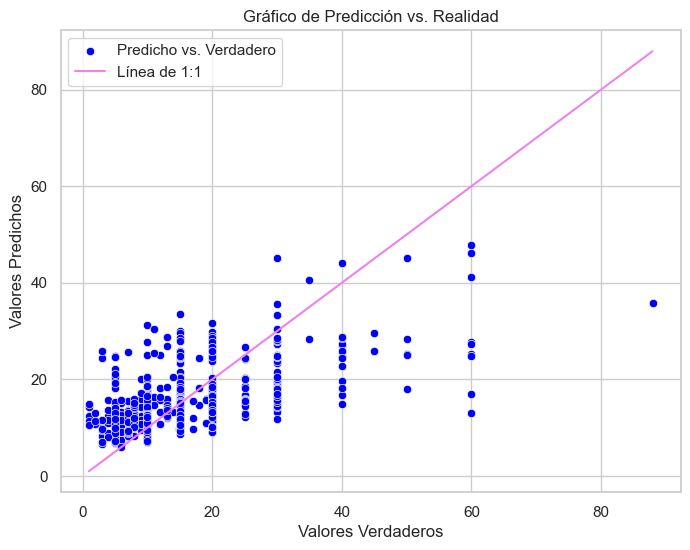

In [2004]:
data = pd.DataFrame({'Predicho': y_pred, 'Verdadero': y_test})


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Verdadero', y='Predicho', data=data, color='blue', label='Predicho vs. Verdadero')
sns.lineplot(x='Verdadero', y='Verdadero', data=data, color='violet', label='Línea de 1:1')

plt.xlabel('Valores Verdaderos')
plt.ylabel('Valores Predichos')
plt.title('Gráfico de Predicción vs. Realidad')
plt.legend()
plt.show()

### Comparando con los dos mejores que me dieron buenos resultados fueron esto

In [2005]:
rand_for.predict(conmetascore)

array([25.86529733])

In [2007]:
RMSE_AND_R2(rand_for, X_test, y_test)

{'El RMSE de tu RandomForestRegressor(max_depth=5) es 7.9457058419114315, y el r2 0.35590975513801215'}

In [2006]:
y_pred = best_est.predict(conmetascore)
y_pred

array([23.98064438])

In [2008]:
#import joblib

# Supongamos que 'modelo' es tu modelo entrenado
#modelo_entrenado = rand_for

# Guardar el modelo en un archivo
#joblib.dump(modelo_entrenado, 'modelo_entrenado_random_forest.pkl')

['modelo_entrenado_random_forest.pkl']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Prepara los nuevos datos (asegúrate de que estén en el mismo formato que los datos de entrenamiento)
new_data = pd.DataFrame({
    "metascore": [75],  # Ejemplo: metascore
    "año_v": [2010],  # Ejemplo: año
    "early_access": [1],  # Ejemplo: early_access
    "Action": [0],  # Ejemplo: género Action
    "Adventure": [1],
    "Casual" : [1],
    "Indie" : [0],
    "Racing" : [0],
    "Simulation" : [0],
    "Sports" : [0],
    "Strategy" : [0] ,
    "Massively Multiplayer" : [0],
    "RPG" : [0] # Ejemplo: género Adventure
    # ... (proporciona los valores correspondientes para otras características)
})
# Columnas a normalizar
columns_to_normalize = ["metascore", "año_v"]

# Crear un escalador MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas seleccionadas
new_data[columns_to_normalize] = scaler.fit_transform(new_data[columns_to_normalize])

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
df_mod_predecirmetascore_dropna

,price,metascore,año_v,early_access,Action,Adventure,Casual,Indie,Racing,Simulation,Sports,Strategy,Massively Multiplayer,RPG
27,9.99,2.201330,-4.880863,0,1,0,0,0,0,0,0,0,0,0
38,6.99,1.087529,-2.566387,0,0,0,0,0,0,0,0,1,0,0
39,6.99,0.716262,-2.566387,0,0,0,0,0,0,0,0,1,0,0
40,9.99,0.344995,-2.566387,0,1,0,0,1,0,0,0,0,0,1
52,9.99,-0.211906,-2.855696,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31884,4.99,-0.119089,-4.012934,0,1,0,0,0,0,0,0,0,0,0
31887,14.99,1.458796,-3.723625,0,1,1,0,0,0,0,0,0,0,0
31889,4.99,0.623445,-3.434315,0,1,0,0,0,0,0,0,0,0,0
31891,14.99,1.922879,-3.145006,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Calcular la distancia euclidiana entre new_data y cada registro en el dataset
distances = euclidean_distances(new_data.values, df_mod_predecirmetascore_dropna.drop(columns=['price']).values)

# Definir un umbral de similitud (puedes ajustarlo según tus necesidades)
threshold = 2

# Filtrar registros similares basados en la distancia euclidiana
similar_records = df_mod_predecirmetascore_dropna[distances.flatten() <= threshold]

# Mostrar los registros similares
similar_records

,price,metascore,año_v,early_access,Action,Adventure,Casual,Indie,Racing,Simulation,Sports,Strategy,Massively Multiplayer,RPG
564,4.99,-0.304723,-1.119839,0,0,1,0,0,0,0,0,0,0,0
639,9.99,0.437811,-1.119839,0,0,1,1,1,0,0,0,0,0,0
681,9.99,-0.861623,-1.119839,0,0,1,1,0,0,0,0,0,0,0
890,9.99,0.716262,-0.830530,0,0,1,1,0,0,0,0,0,0,0
966,9.99,-0.211906,-0.830530,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31043,19.99,0.252178,-1.119839,0,0,1,1,0,0,0,0,0,0,0
31052,4.99,-0.861623,-1.119839,0,0,1,1,1,0,0,0,0,0,0
31056,5.99,-0.304723,-1.119839,0,0,1,1,1,0,0,0,0,0,0
31212,9.99,-0.119089,-1.409149,0,0,1,1,1,0,0,0,0,0,0


In [ ]:
predictions = best_est.predict(new_data)
predictions

array([18.44904752])

In [ ]:
similar_records["price"].sort_values(ascending=True).head(1)

22823    0.0
Name: price, dtype: float64

In [ ]:
 # Realizar predicciones para los datos proporcionados
predictions = best_est.predict(new_data)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(similar_records["price"].sort_values(ascending=True).head(1), predictions))
rmse

18.449047516242167

In [ ]:
predictions = model_inputado.predict(new_data)
predictions

c:\Users\Agus_\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([13.57406609])

In [ ]:
predictions = modeldropna.predict(new_data)
predictions

array([33.39248269])